In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Q1)1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [3]:
election.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
election.shape


(1525, 10)

In [5]:
election.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [6]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [7]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [9]:
election = election.replace(replace)

In [10]:
election["gender"].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [11]:
election["vote"].value_counts()

0    1063
1     462
Name: vote, dtype: int64

In [12]:
data = election[election.duplicated()]
data.head(1525)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [13]:
election.skew()

Unnamed: 0                 0.000000
vote                       0.858449
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
gender                     0.130239
dtype: float64

# Q2)Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

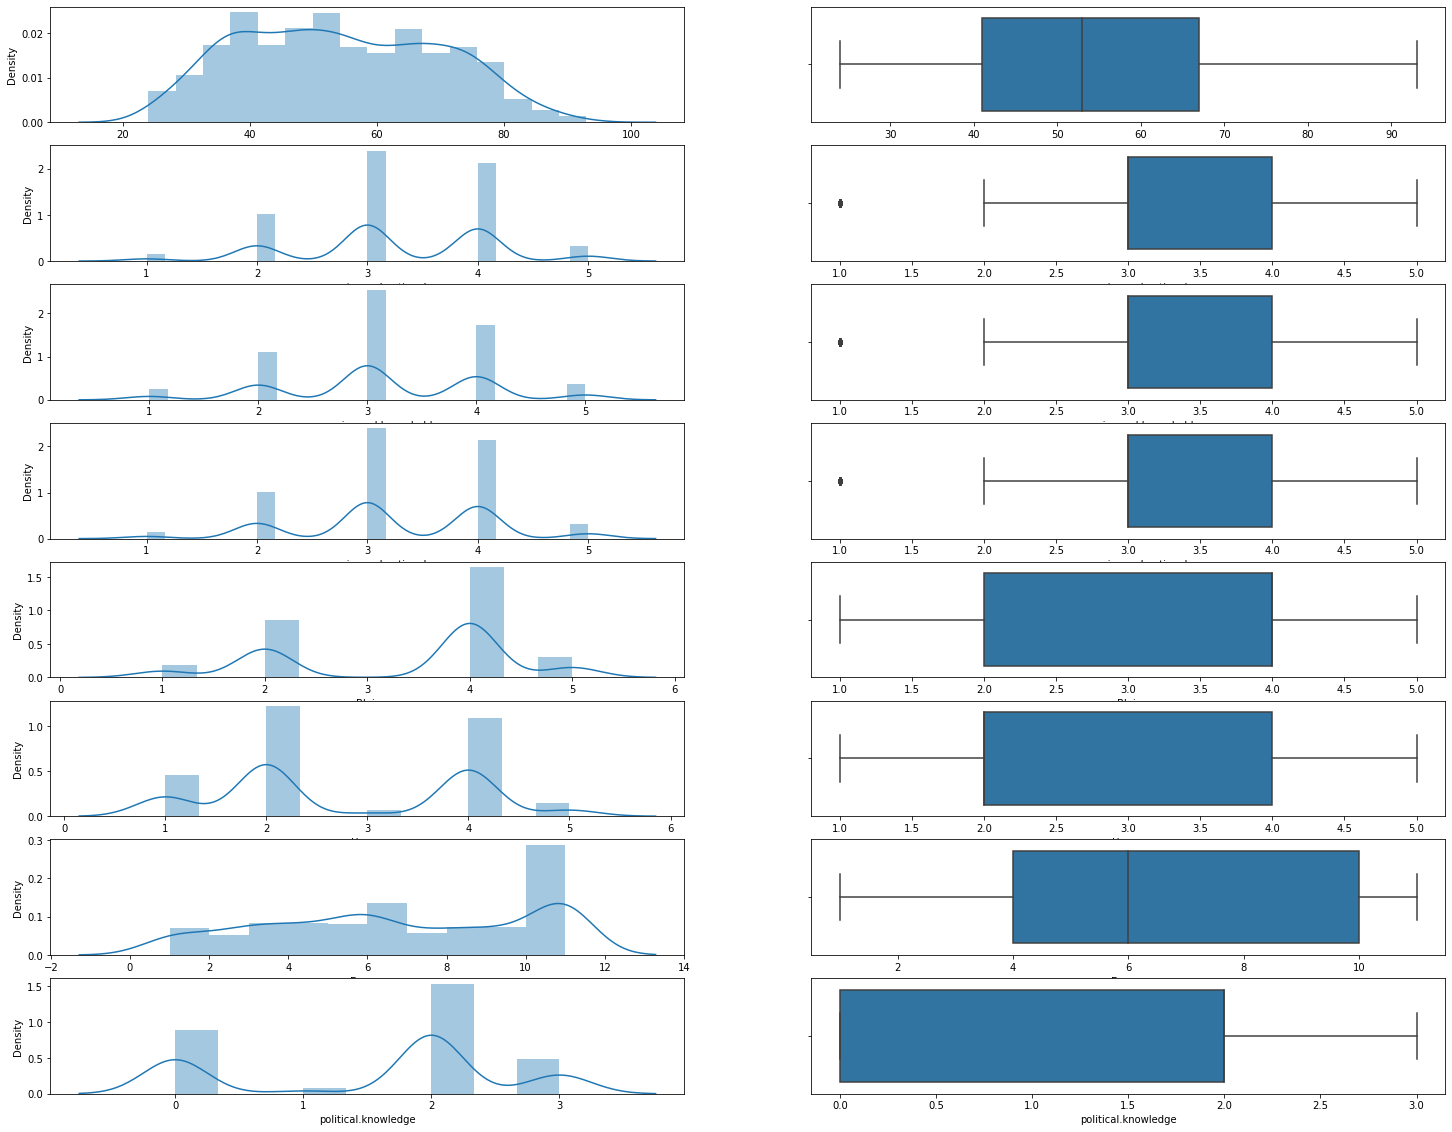

In [14]:

fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(25,20)
sas.distplot(election['age'], kde=True, ax=axes[0][0])
sas.boxplot(x='age', data=election, ax=axes[0][1])
sas.distplot(election['economic.cond.national'] , kde=True, ax=axes[1][0])
sas.boxplot(x='economic.cond.national', data=election , ax=axes[1][1])
sas.distplot(election['economic.cond.household'], kde=True, ax=axes[2][0])
sas.boxplot(x='economic.cond.household', data=election, ax=axes[2][1])
sas.distplot(election['economic.cond.national'] , kde=True, ax=axes[3][0])
sas.boxplot(x='economic.cond.national', data=election , ax=axes[3][1])
sas.distplot(election['Blair'], kde=True, ax=axes[4][0])
sas.boxplot(x='Blair', data=election, ax=axes[4][1])
sas.distplot(election['Hague'] , kde=True, ax=axes[5][0])
sas.boxplot(x='Hague', data=election , ax=axes[5][1])
sas.distplot(election['Europe'] , kde=True, ax=axes[6][0])
sas.boxplot(x='Europe', data=election , ax=axes[6][1])
sas.distplot(election['political.knowledge'], kde=True, ax=axes[7][0])
sas.boxplot(x='political.knowledge', data=election, ax=axes[7][1])




plt.show()

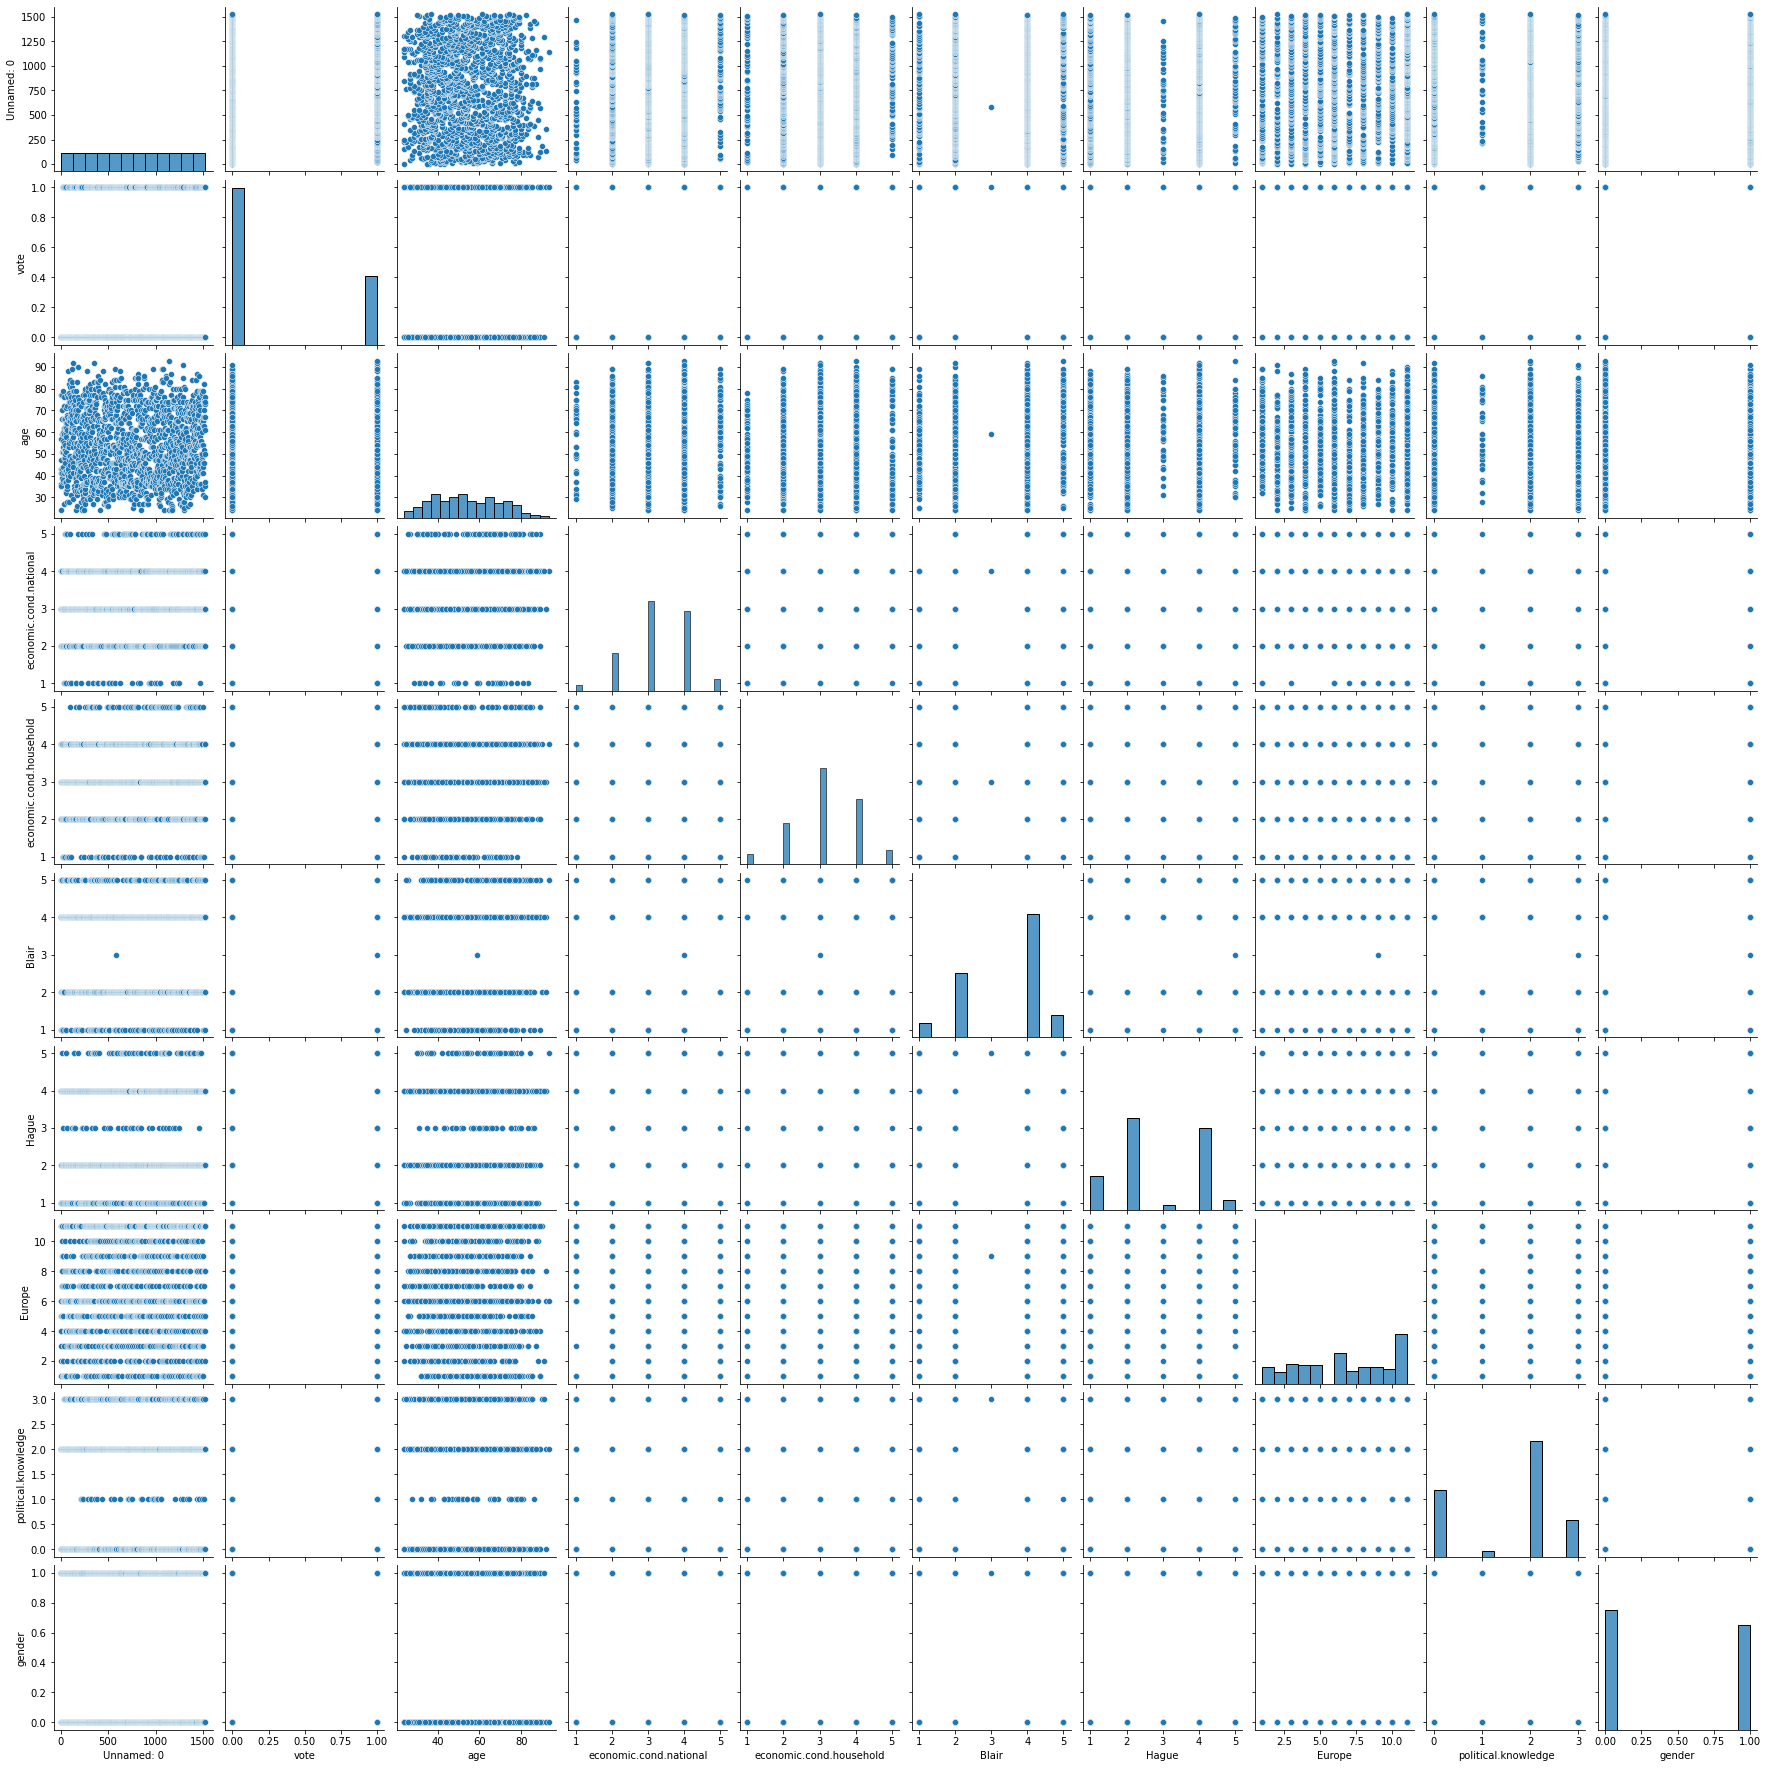

In [15]:
sas.pairplot(election)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

<AxesSubplot:xlabel='Hague', ylabel='age'>

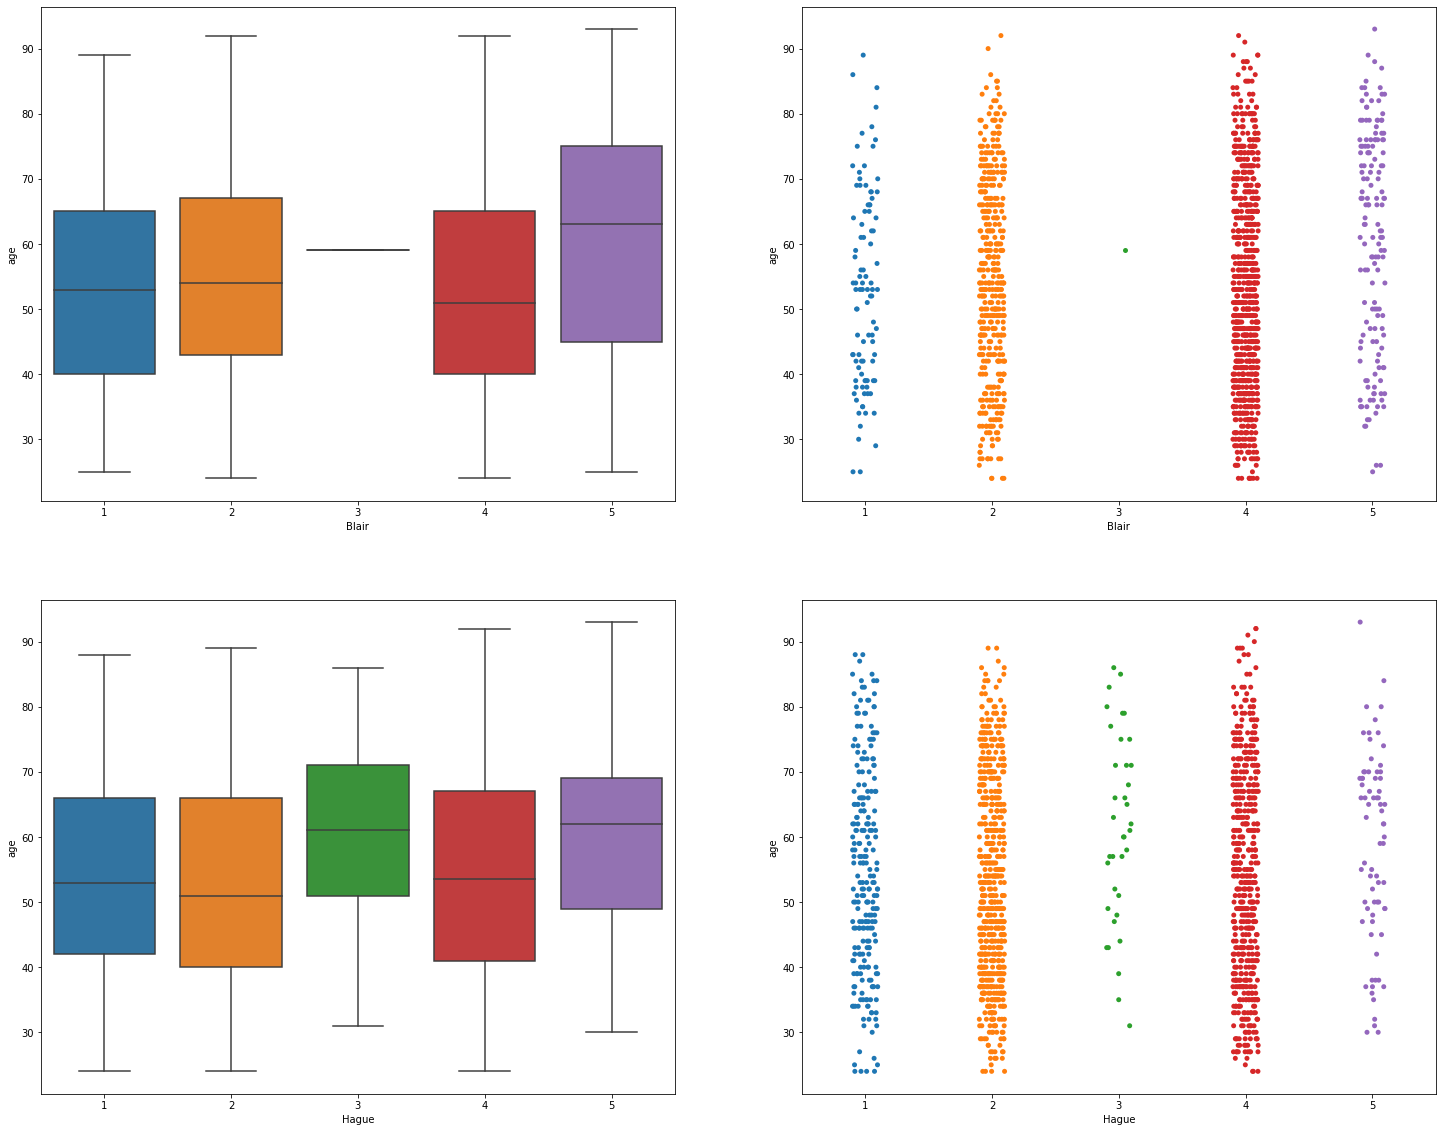

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,20)
sas.boxplot(election["Blair"],election["age"], ax = axes[0][0])
sas.stripplot(election["Blair"],election["age"], ax = axes[0][1])
sas.boxplot(election["Hague"],election["age"], ax = axes[1][0])
sas.stripplot(election["Hague"],election["age"], ax = axes[1][1])

<AxesSubplot:xlabel='Blair', ylabel='Count'>

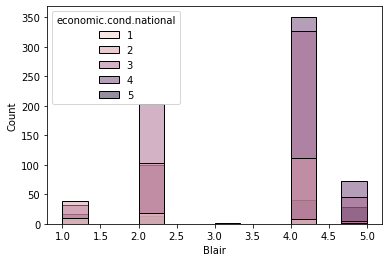

In [17]:
sas.histplot(data =election , x = "Blair", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

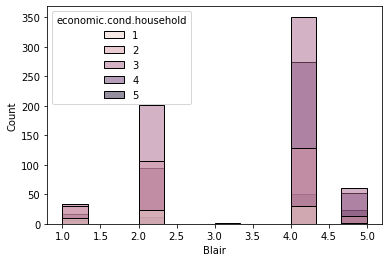

In [18]:
sas.histplot(data =election , x = "Blair", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

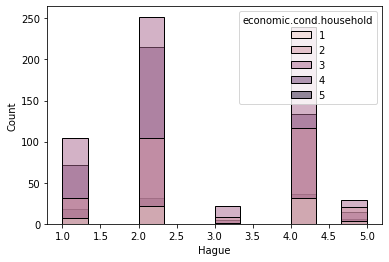

In [19]:
sas.histplot(data =election , x = "Hague", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

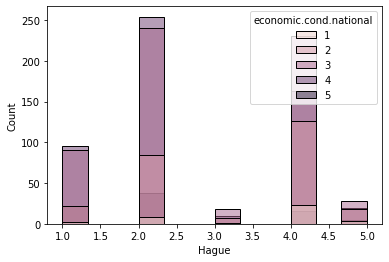

In [20]:
sas.histplot(data =election , x = "Hague", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

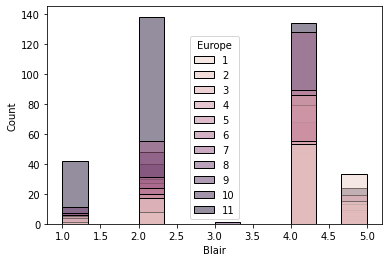

In [21]:
sas.histplot(data =election , x = "Blair", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

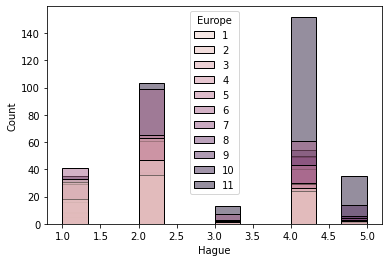

In [22]:
sas.histplot(data =election , x = "Hague", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

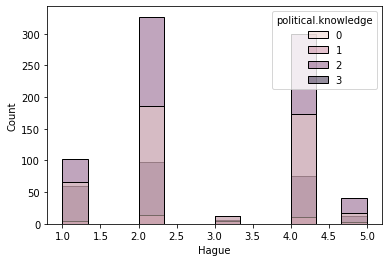

In [23]:
sas.histplot(data =election , x = "Hague", hue = "political.knowledge")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

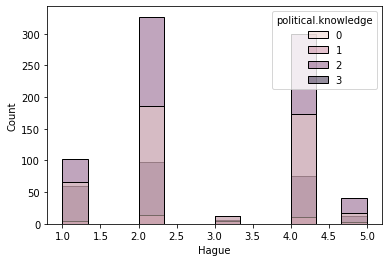

In [24]:
sas.histplot(data =election , x = "Hague", hue = "political.knowledge")

In [25]:
covMatrix = np.cov(election,bias=True)
print (covMatrix)

[[ 1.5449000e+02  1.2422000e+02  1.2159000e+02 ... -6.1580000e+02
  -5.3059000e+02 -4.8138000e+02]
 [ 1.2422000e+02  1.0096000e+02  9.8020000e+01 ... -5.3430000e+02
  -4.6402000e+02 -4.2434000e+02]
 [ 1.2159000e+02  9.8020000e+01  9.6090000e+01 ... -3.3900000e+02
  -2.7229000e+02 -2.3338000e+02]
 ...
 [-6.1580000e+02 -5.3430000e+02 -3.3900000e+02 ...  2.0713260e+05
   2.0688370e+05  2.0691000e+05]
 [-5.3059000e+02 -4.6402000e+02 -2.7229000e+02 ...  2.0688370e+05
   2.0669269e+05  2.0674648e+05]
 [-4.8138000e+02 -4.2434000e+02 -2.3338000e+02 ...  2.0691000e+05
   2.0674648e+05  2.0681676e+05]]


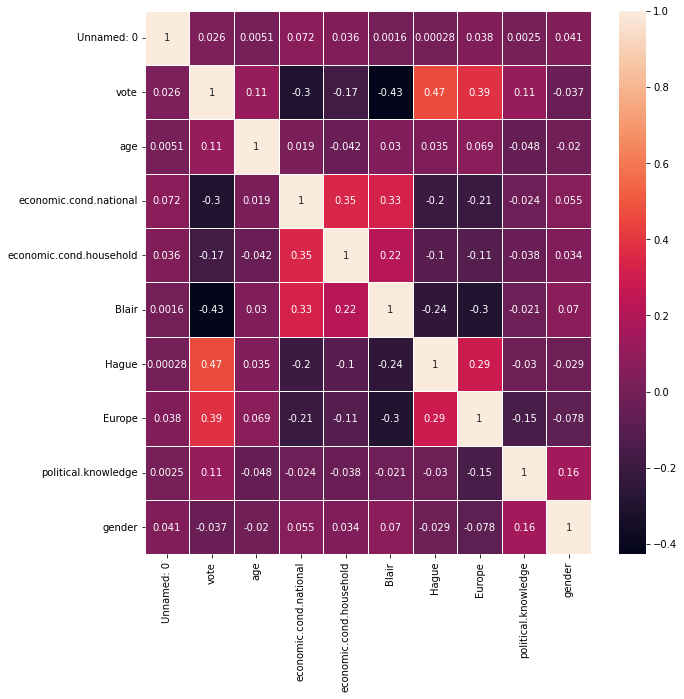

In [26]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sas.heatmap(election.corr(), annot=True,linewidth = 1)

# Q3)Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test

In [27]:
#from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(election)
scaled

In [28]:

from sklearn.model_selection import train_test_split

In [29]:
x = election.drop("vote",axis = 1)
y = election.pop("vote")

In [30]:
#x = np.linspace(0, 2*np.pi, 8)
#y = np.sin(x) + np.random.normal(0, 0.4, 8)

In [31]:
#x = x.reshape(-1, 1)

In [32]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

# Apply Logistic Regression and LDA (Linear Discriminant Analysis)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)

In [35]:
lr.fit(x_train,y_train)


LogisticRegression(max_iter=2000, random_state=0)

In [36]:
y_train_predict=lr.predict(x_train)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       735
           1       0.77      0.69      0.72       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AxesSubplot(0.125,0.125;0.62x0.755)


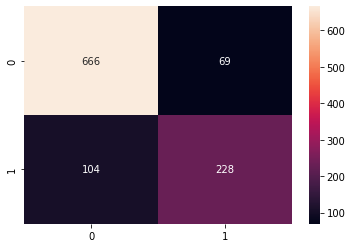

In [39]:
print(sas.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [40]:
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,lr.predict(x_test)))

[[292  36]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [41]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16213683223992503


In [42]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.17685589519650655


In [43]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.889


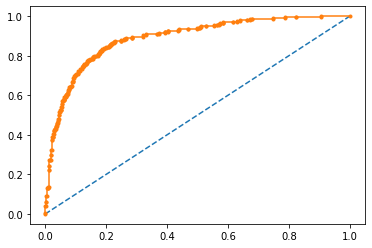

In [44]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.883


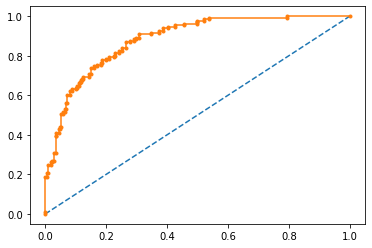

In [45]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Linear Discriminant Analysis

In [46]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
lda = LinearDiscriminantAnalysis()

In [48]:
lda = lda.fit(x_train,y_train)

In [49]:
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[660  97]
 [ 75 235]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       757
           1       0.71      0.76      0.73       310

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [50]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[289  44]
 [ 39  86]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       333
           1       0.66      0.69      0.67       125

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.889


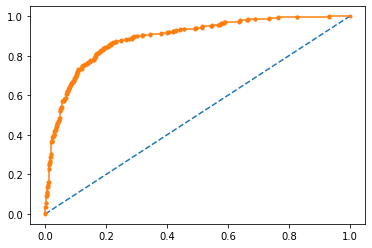

In [51]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.884


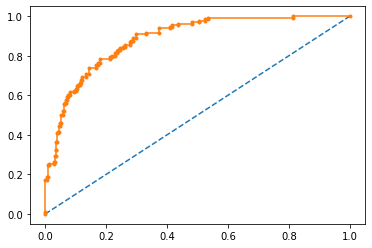

In [52]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q5)Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [60]:
knn = knn.fit(x_train,y_train)

In [64]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.648471615720524

In [69]:
print(confusion_matrix(knn.predict(x_train),y_train))


[[672 154]
 [ 63 178]]


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [71]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       351
           1       0.29      0.36      0.32       107

    accuracy                           0.65       458
   macro avg       0.54      0.55      0.54       458
weighted avg       0.67      0.65      0.66       458



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


AUC: 0.843


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


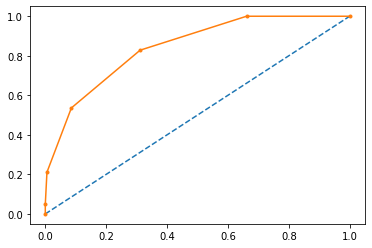

In [72]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.596


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


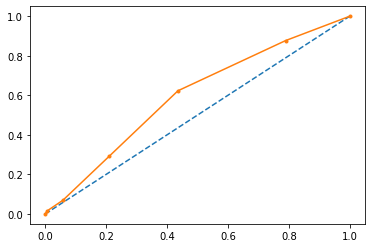

In [73]:

# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# naive bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
nb=GaussianNB()

In [76]:
nb= nb.fit(x_train, y_train)

In [77]:
print(confusion_matrix(nb.predict(x_train),y_train))
print(classification_report(nb.predict(x_train),y_train))

[[653  90]
 [ 82 242]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       743
           1       0.73      0.75      0.74       324

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [78]:
print(confusion_matrix(nb.predict(x_test),y_test))
print(classification_report(nb.predict(x_test),y_test))

[[282  36]
 [ 46  94]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       318
           1       0.72      0.67      0.70       140

    accuracy                           0.82       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.888


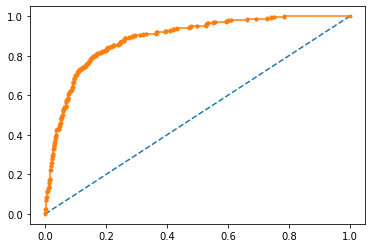

In [79]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.886


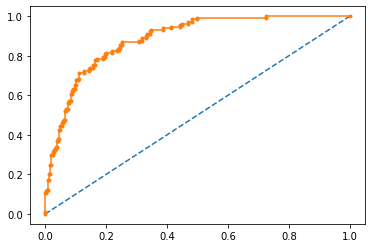

In [80]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q6)Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [83]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [84]:
ADB_model=AdaBoostClassifier()

In [85]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [86]:
grid_search.fit(x_train,y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoo

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoo

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoo

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [87]:
ADB_model=grid_search.best_estimator_

In [88]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [89]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8622305529522024
[[672  63]
 [ 84 248]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       735
           1       0.80      0.75      0.77       332

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AUC: 0.929


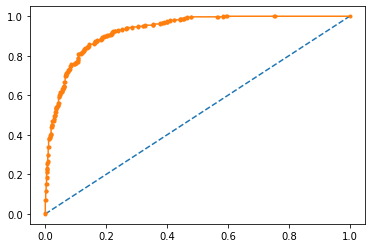

In [92]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [93]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8144104803493449
[[288  40]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       328
           1       0.68      0.65      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AUC: 0.883


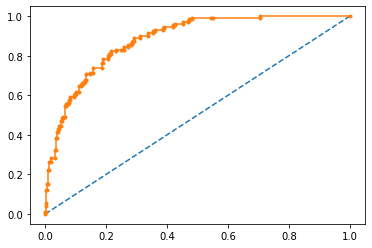

In [91]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [96]:
DT_model= DecisionTreeClassifier()

In [97]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [98]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [99]:
DT_model=grid_search.best_estimator_

In [100]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                       random_state=0)

In [101]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.837863167760075
[[663  72]
 [101 231]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AUC: 0.896


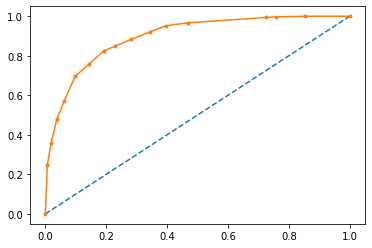

In [103]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [104]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8144104803493449
[[285  43]
 [ 42  88]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC: 0.870


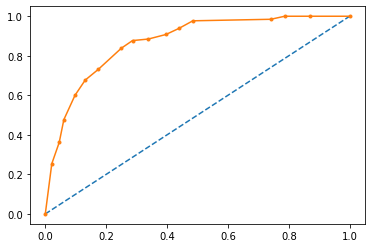

In [106]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [109]:

RF_model=RandomForestClassifier()

In [110]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [111]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [112]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [113]:
RF_model=grid_search.best_estimator_

In [114]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [115]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8556701030927835
[[686  49]
 [105 227]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       735
           1       0.82      0.68      0.75       332

    accuracy                           0.86      1067
   macro avg       0.84      0.81      0.82      1067
weighted avg       0.85      0.86      0.85      1067



AUC: 0.915


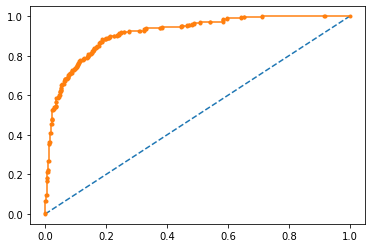

In [116]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [117]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8296943231441049
[[291  37]
 [ 41  89]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       328
           1       0.71      0.68      0.70       130

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.898


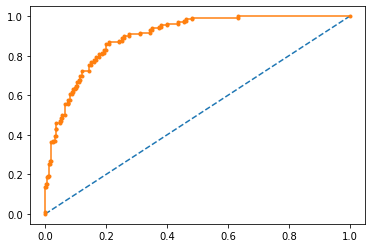

In [119]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q8) Based on these predictions, what are the insights

1)Comparing all the performance measure, Naïve Bayes model from second iteration is performing best. Although there are some other models such as SVM and Extreme Boosting which is performing almost same as that of Naïve Bayes. But Naïve Bayes model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

2)Labour party is performing better than Conservative from huge margin.

3)Female voters turn out is greater than the male voters.

4)Those who have better national economic conditions are preferring to vote for Labour party.
5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party.
6)Those who have higher political knowledge have voted for Conservative party
7)Looking at the assessment for both the leaders, Labour Leader is performing well as he has got better ratings in assessment.